In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
#use it if one-hot encoding needed for class column
one_hot = pd.get_dummies(df["class"])
df = df.drop("class", axis = 1)
df = df.join(one_hot)

In [10]:
#converting class column into number type
df['class'] = (df['class'] == "g").astype(int)

In [11]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


Brief preview of each feature

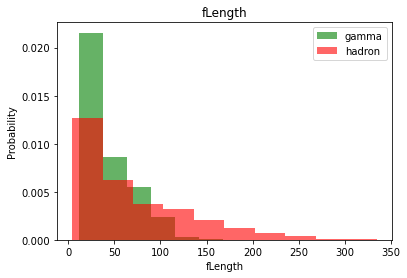

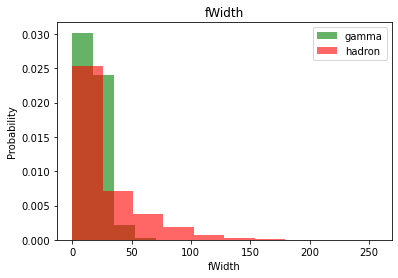

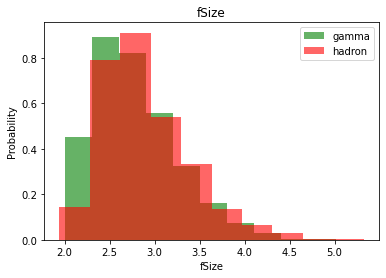

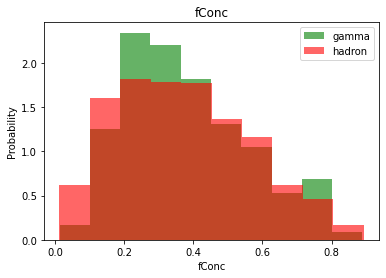

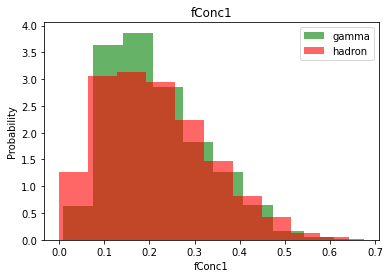

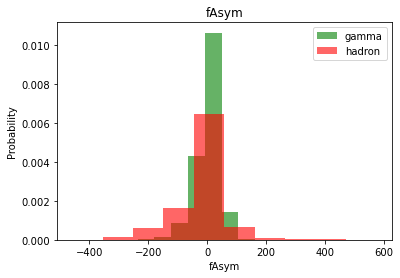

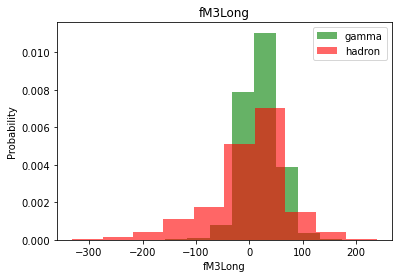

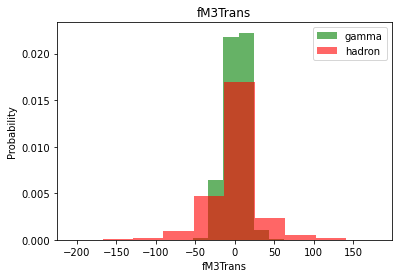

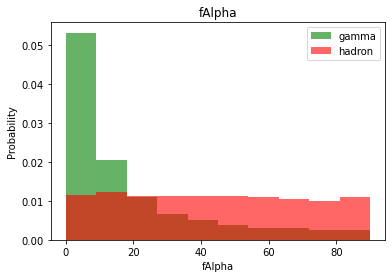

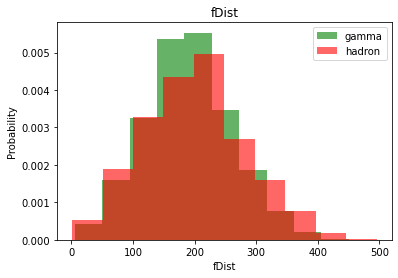

In [12]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = "green", label = "gamma", alpha = 0.6, density = True)
    plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.6, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [44]:
#splitting data into 60-20-20 proportin
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [45]:
#function to standartize the data
def scale(data, oversample = False):
    X = data[data.columns[:-1]].values
    y = data[data.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    new_data = np.hstack((X, np.reshape(y,(len(y),1))))#instead of len(y) we can write -1
    
    return new_data, X, y

In [46]:
train, X_train, y_train = scale(train, oversample = True)
valid, X_valid, y_valid = scale(valid, oversample = False)
test, X_test, y_test = scale(test, oversample = False)

In [47]:
print(Counter(y_train))
print(Counter(y_valid))
print(Counter(y_test))

Counter({1: 7392, 0: 7392})
Counter({1: 2485, 0: 1319})
Counter({1: 2455, 0: 1349})


In [52]:
#knn with 5 neighbours
knn_model_1 = KNeighborsClassifier(n_neighbors=1)
knn_model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
y_pred = knn_model_1.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1349
           1       0.83      0.89      0.86      2455

    accuracy                           0.81      3804
   macro avg       0.80      0.77      0.78      3804
weighted avg       0.81      0.81      0.80      3804



In [55]:
knn_model_5 = KNeighborsClassifier()
knn_model_5.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred_5 = knn_model_5.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1349
           1       0.85      0.86      0.86      2455

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

